# Loading Datasets

In [1]:
import pandas as pd
import numpy as np
import pycountry

In [121]:
world_bank = pd.read_csv("API_BX.TRF.PWKR.DT.GD.ZS_DS2_en_csv_v2_245443.csv", skiprows = 4)
em_dat = pd.read_excel("public_emdat_custom_request_2024-05-02_ded84ba8-4331-4fb3-b9e2-3b46c013af70 (2).xlsx")

In [122]:
country_code_to_name = {country.alpha_3: country.name for country in pycountry.countries}

world_bank['Country Name'] = world_bank['Country Code'].map(country_code_to_name)
world_bank['Country Code'] = world_bank['Country Code'].apply(lambda x: x.upper())

em_dat['Country'] = em_dat['ISO'].map(country_code_to_name)
em_dat['ISO'] = em_dat['ISO'].apply(lambda x: x.upper())

In [123]:
world_bank.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.810387,1.765777,1.815417,1.126930,1.009012,1.367148,1.155124,1.079905,NaN,NaN
1,NaN,AFE,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180510,1.029486,0.982369,1.347993,1.436747,1.488722,1.560329,1.541921,NaN,NaN
2,Afghanistan,AFG,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.821996,3.464843,4.387093,4.450986,4.407428,3.953297,2.243017,NaN,NaN,NaN
3,NaN,AFW,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.128857,4.169626,4.692655,4.577658,4.307428,3.761344,3.927797,4.077403,NaN,NaN
4,Angola,AGO,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012282,0.007559,0.001925,0.001988,0.004860,0.016604,0.018993,0.013116,NaN,NaN


In [124]:
em_dat.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,20000.0,206054.0,9.706216,NaN,2007-11-08,2023-09-25
2,1960-0004-SUN,Yes,tec-tra-wat-wat,Technological,Transport,Water,Water,NaN,Submarine,SUN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-12-03,2023-09-25
3,1960-0007-PER,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2004-04-13,2023-09-25
4,1960-0008-NIU,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Corine,NIU,...,NaN,NaN,NaN,NaN,41.0,422.0,9.706216,NaN,2003-07-01,2023-09-25


In [125]:
# drop rows where country name is null
world_bank = world_bank.dropna(subset = "Country Name")

em_dat = em_dat.dropna(subset = "Country")

In [126]:
em_dat.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,20000.0,206054.0,9.706216,NaN,2007-11-08,2023-09-25
3,1960-0007-PER,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2004-04-13,2023-09-25
4,1960-0008-NIU,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Corine,NIU,...,NaN,NaN,NaN,NaN,41.0,422.0,9.706216,NaN,2003-07-01,2023-09-25
5,1960-0009-ZAF,Yes,tec-ind-exp-exp,Technological,Industrial accident,Explosion (Industrial),Explosion (Industrial),NaN,Mine,ZAF,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25


In [127]:
world_bank.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [128]:
world_bank.drop(columns = ["Indicator Name", "Indicator Code",'1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', "2023", "Unnamed: 68"], inplace = True)

In [129]:
world_bank.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.131596,2.100722,1.810387,1.765777,1.815417,1.126930,1.009012,1.367148,1.155124,1.079905
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.723211,1.236114,1.821996,3.464843,4.387093,4.450986,4.407428,3.953297,2.243017,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027684,0.022778,0.012282,0.007559,0.001925,0.001988,0.004860,0.016604,0.018993,0.013116
5,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.033074,10.742301,11.336438,11.010768,10.075653,9.621069,9.562582,9.668357,9.583390,9.226106
6,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.668748,1.640134,1.593959,0.000000


In [130]:
cols = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

world_bank = world_bank.melt(id_vars = ["Country Name", "Country Code"], value_vars = cols, var_name = "Year", value_name = "Remittance")
world_bank.to_csv("world_bank.csv")
world_bank.head()

,Country Name,Country Code,Year,Remittance
0,Aruba,ABW,1970,NaN
1,Afghanistan,AFG,1970,NaN
2,Angola,AGO,1970,NaN
3,Albania,ALB,1970,NaN
4,Andorra,AND,1970,NaN


In [131]:
world_bank["Year"] = world_bank["Year"].astype(int)
world_bank = world_bank[world_bank.Year >= 2000]
world_bank

,Country Name,Country Code,Year,Remittance
6450,Aruba,ABW,2000,0.057850
6451,Afghanistan,AFG,2000,NaN
6452,Angola,AGO,2000,NaN
6453,Albania,ALB,2000,17.176407
6454,Andorra,AND,2000,NaN
...,...,...,...,...
11390,Samoa,WSM,2022,33.611662
11391,Yemen,YEM,2022,17.207872
11392,South Africa,ZAF,2022,0.215376
11393,Zambia,ZMB,2022,0.834892


In [132]:
# Fill NaN values with the median of each country
world_bank['Remittance'] = world_bank.groupby('Country Name')['Remittance'].transform(lambda x: x.fillna(x.mean()))

# View the results (optional)
world_bank.head()

,Country Name,Country Code,Year,Remittance
6450,Aruba,ABW,2000,0.057850
6451,Afghanistan,AFG,2000,2.011777
6452,Angola,AGO,2000,0.015215
6453,Albania,ALB,2000,17.176407
6454,Andorra,AND,2000,0.216824


In [133]:
world_bank.isnull().sum()/len(world_bank)*100

Country Name    0.000000
Country Code    0.000000
Year            0.000000
Remittance      7.906977
dtype: float64

In [134]:
world_bank.dropna(inplace = True)

In [135]:
em_dat.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [136]:
em_dat = em_dat[em_dat["Disaster Group"] == "Natural"]
em_dat.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,20000.0,206054.0,9.706216,NaN,2007-11-08,2023-09-25
3,1960-0007-PER,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2004-04-13,2023-09-25
4,1960-0008-NIU,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Corine,NIU,...,NaN,NaN,NaN,NaN,41.0,422.0,9.706216,NaN,2003-07-01,2023-09-25
6,1960-0010-MAR,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,MAR,...,NaN,NaN,NaN,NaN,120000.0,1236321.0,9.706216,NaN,2004-04-13,2023-10-19


In [137]:
em_dat.drop(columns = ['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subtype',
       'External IDs', 'Event Name','Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution (\'000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Month', 'Start Day',
        'End Year', 'End Month', 'End Day','Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
        'Reconstruction Costs (\'000 US$)',
       'Reconstruction Costs, Adjusted (\'000 US$)',
       'Insured Damage (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)',
       'Total Damage (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update', 'No. Injured', 'No. Affected', 'No. Homeless', 'Disaster Subgroup'], inplace = True)

em_dat.head()

,Disaster Type,ISO,Country,Start Year,Total Deaths,Total Affected
0,Flood,BGD,Bangladesh,1960,10000.0,NaN
1,Earthquake,IRN,"Iran, Islamic Republic of",1960,480.0,NaN
3,Earthquake,PER,Peru,1960,63.0,200.0
4,Storm,NIU,Niue,1960,NaN,4000.0
6,Earthquake,MAR,Morocco,1960,13100.0,NaN


In [138]:
em_dat.rename(columns = {"ISO": "Country Code", "Country":"Country Name", "Start Year":"Year"}, inplace = True)

In [139]:
em_dat["Year"] = em_dat["Year"].astype(int)
em_dat = em_dat[(em_dat["Year"] >= 2000) & (em_dat["Year"] < 2023)]
em_dat

,Disaster Type,Country Code,Country Name,Year,Total Deaths,Total Affected
9540,Drought,DJI,Djibouti,2001,NaN,100000.0
9545,Drought,SDN,Sudan,2000,NaN,2000000.0
9546,Drought,SOM,Somalia,2000,21.0,1200000.0
9551,Flood,AGO,Angola,2000,31.0,70000.0
9552,Extreme temperature,BGD,Bangladesh,2000,49.0,NaN
...,...,...,...,...,...,...
24600,Drought,MWI,Malawi,2022,NaN,2678193.0
24601,Drought,MLI,Mali,2022,NaN,1735753.0
24602,Drought,NGA,Nigeria,2022,NaN,19110398.0
24603,Drought,SDN,Sudan,2022,NaN,11839300.0


In [140]:
em_dat['Total Deaths'] = em_dat.groupby('Country Name')['Total Deaths'].transform(lambda x: x.fillna(x.mean()))
em_dat['Total Affected'] = em_dat.groupby('Country Name')['Total Affected'].transform(lambda x: x.fillna(x.mean()))
em_dat

,Disaster Type,Country Code,Country Name,Year,Total Deaths,Total Affected
9540,Drought,DJI,Djibouti,2001,13.666667,1.000000e+05
9545,Drought,SDN,Sudan,2000,102.729167,2.000000e+06
9546,Drought,SOM,Somalia,2000,21.000000,1.200000e+06
9551,Flood,AGO,Angola,2000,31.000000,7.000000e+04
9552,Extreme temperature,BGD,Bangladesh,2000,49.000000,1.064063e+06
...,...,...,...,...,...,...
24600,Drought,MWI,Malawi,2022,108.350000,2.678193e+06
24601,Drought,MLI,Mali,2022,19.047619,1.735753e+06
24602,Drought,NGA,Nigeria,2022,179.129412,1.911040e+07
24603,Drought,SDN,Sudan,2022,102.729167,1.183930e+07


In [141]:
em_dat.isnull().sum()/len(em_dat)*100

Disaster Type     0.000000
Country Code      0.000000
Country Name      0.000000
Year              0.000000
Total Deaths      0.337268
Total Affected    0.221332
dtype: float64

In [142]:
em_dat.dropna(inplace = True)

In [143]:
em_dat.isnull().sum()/len(em_dat)*100

Disaster Type     0.0
Country Code      0.0
Country Name      0.0
Year              0.0
Total Deaths      0.0
Total Affected    0.0
dtype: float64

## Merge Datasets

In [144]:
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4554 entries, 6450 to 11394
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  4554 non-null   object 
 1   Country Code  4554 non-null   object 
 2   Year          4554 non-null   int32  
 3   Remittance    4554 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 160.1+ KB


In [145]:
em_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9436 entries, 9540 to 24604
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Type   9436 non-null   object 
 1   Country Code    9436 non-null   object 
 2   Country Name    9436 non-null   object 
 3   Year            9436 non-null   int32  
 4   Total Deaths    9436 non-null   float64
 5   Total Affected  9436 non-null   float64
dtypes: float64(2), int32(1), object(3)
memory usage: 479.2+ KB


In [146]:
world_bank["Year"] = world_bank["Year"].astype(str)
em_dat["Year"] = em_dat["Year"].astype(str)

In [147]:
merged_data = pd.merge(world_bank, em_dat, on = ["Country Name", "Country Code", "Year"], how = "left")
merged_data.to_csv("merged_data.csv")
merged_data

,Country Name,Country Code,Year,Remittance,Disaster Type,Total Deaths,Total Affected
0,Aruba,ABW,2000,0.057850,NaN,NaN,NaN
1,Afghanistan,AFG,2000,2.011777,Epidemic,507.00000,286061.25641
2,Afghanistan,AFG,2000,2.011777,Epidemic,16.00000,11.00000
3,Afghanistan,AFG,2000,2.011777,Epidemic,19.00000,1604.00000
4,Afghanistan,AFG,2000,2.011777,Epidemic,15.00000,613.00000
...,...,...,...,...,...,...,...
11090,South Africa,ZAF,2022,0.215376,Flood,17.00000,40000.00000
11091,Zambia,ZMB,2022,0.834892,Flood,3.00000,21582.00000
11092,Zimbabwe,ZWE,2022,11.273013,Flood,210.40625,550224.25000
11093,Zimbabwe,ZWE,2022,11.273013,Storm,210.40625,3000.00000


## Data Quality check and Handling Missing Data

In [148]:
merged_data.isnull().sum()

Country Name         0
Country Code         0
Year                 0
Remittance           0
Disaster Type     1856
Total Deaths      1856
Total Affected    1856
dtype: int64

In [149]:
merged_data.isnull().sum()/len(merged_data)*100

Country Name       0.000000
Country Code       0.000000
Year               0.000000
Remittance         0.000000
Disaster Type     16.728256
Total Deaths      16.728256
Total Affected    16.728256
dtype: float64

In [ ]:
#merged_data["Remittance"] = merged_data["Remittance"].fillna(merged_data["Remittance"].mean())
#merged_data["Disaster Type"] = merged_data["Disaster Type"].fillna(merged_data["Disaster Type"].mode()[0])
#merged_data["Total Affected"] = merged_data["Total Affected"].fillna(merged_data["Total Affected"].mean())
#merged_data["Total Deaths"] = merged_data["Total Deaths"].fillna(merged_data["Total Deaths"].mean())

In [150]:
merged_data.head()

,Country Name,Country Code,Year,Remittance,Disaster Type,Total Deaths,Total Affected
0,Aruba,ABW,2000,0.057850,NaN,NaN,NaN
1,Afghanistan,AFG,2000,2.011777,Epidemic,507.0,286061.25641
2,Afghanistan,AFG,2000,2.011777,Epidemic,16.0,11.00000
3,Afghanistan,AFG,2000,2.011777,Epidemic,19.0,1604.00000
4,Afghanistan,AFG,2000,2.011777,Epidemic,15.0,613.00000


In [151]:
# Create a new column for Disaster Type with Flag
merged_data['Disaster Type with Flag'] = merged_data['Disaster Type'].fillna('No Reported Disaster')

print("Dataframe after adding new Disaster Type column:")
merged_data.head()

Dataframe after adding new Disaster Type column:


,Country Name,Country Code,Year,Remittance,Disaster Type,Total Deaths,Total Affected,Disaster Type with Flag
0,Aruba,ABW,2000,0.057850,NaN,NaN,NaN,No Reported Disaster
1,Afghanistan,AFG,2000,2.011777,Epidemic,507.0,286061.25641,Epidemic
2,Afghanistan,AFG,2000,2.011777,Epidemic,16.0,11.00000,Epidemic
3,Afghanistan,AFG,2000,2.011777,Epidemic,19.0,1604.00000,Epidemic
4,Afghanistan,AFG,2000,2.011777,Epidemic,15.0,613.00000,Epidemic


In [152]:
merged_data["Total Affected"] = merged_data["Total Affected"].fillna(0)
merged_data["Total Deaths"] = merged_data["Total Deaths"].fillna(0)

In [153]:
merged_data.isnull().sum()/len(merged_data)*100

Country Name                0.000000
Country Code                0.000000
Year                        0.000000
Remittance                  0.000000
Disaster Type              16.728256
Total Deaths                0.000000
Total Affected              0.000000
Disaster Type with Flag     0.000000
dtype: float64

In [154]:
merged_data.drop(columns = "Disaster Type", inplace = True)
merged_data.rename(columns = {"Disaster Type with Flag":"Disaster Type"}, inplace = True)
merged_data

,Country Name,Country Code,Year,Remittance,Total Deaths,Total Affected,Disaster Type
0,Aruba,ABW,2000,0.057850,0.00000,0.00000,No Reported Disaster
1,Afghanistan,AFG,2000,2.011777,507.00000,286061.25641,Epidemic
2,Afghanistan,AFG,2000,2.011777,16.00000,11.00000,Epidemic
3,Afghanistan,AFG,2000,2.011777,19.00000,1604.00000,Epidemic
4,Afghanistan,AFG,2000,2.011777,15.00000,613.00000,Epidemic
...,...,...,...,...,...,...,...
11090,South Africa,ZAF,2022,0.215376,17.00000,40000.00000,Flood
11091,Zambia,ZMB,2022,0.834892,3.00000,21582.00000,Flood
11092,Zimbabwe,ZWE,2022,11.273013,210.40625,550224.25000,Flood
11093,Zimbabwe,ZWE,2022,11.273013,210.40625,3000.00000,Storm


In [155]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11095 entries, 0 to 11094
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    11095 non-null  object 
 1   Country Code    11095 non-null  object 
 2   Year            11095 non-null  object 
 3   Remittance      11095 non-null  float64
 4   Total Deaths    11095 non-null  float64
 5   Total Affected  11095 non-null  float64
 6   Disaster Type   11095 non-null  object 
dtypes: float64(3), object(4)
memory usage: 606.9+ KB


In [ ]:
merged_data["Year"] = merged_data["Year"].dt.to_period("Y")

In [163]:
merged_data.head()

,Country Name,Country Code,Year,Remittance,Total Deaths,Total Affected,Disaster Type
0,Aruba,ABW,2000,0.057850,0.0,0.00000,No Reported Disaster
1,Afghanistan,AFG,2000,2.011777,507.0,286061.25641,Epidemic
2,Afghanistan,AFG,2000,2.011777,16.0,11.00000,Epidemic
3,Afghanistan,AFG,2000,2.011777,19.0,1604.00000,Epidemic
4,Afghanistan,AFG,2000,2.011777,15.0,613.00000,Epidemic


In [164]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11095 entries, 0 to 11094
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    11095 non-null  object 
 1   Country Code    11095 non-null  object 
 2   Year            11095 non-null  int32  
 3   Remittance      11095 non-null  float64
 4   Total Deaths    11095 non-null  float64
 5   Total Affected  11095 non-null  float64
 6   Disaster Type   11095 non-null  object 
dtypes: float64(3), int32(1), object(3)
memory usage: 563.5+ KB


## Data Normalization using StandardScaler

In [178]:
from sklearn.preprocessing import StandardScaler
# Select numeric columns
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns
df_numeric = merged_data[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
df_normalized = scaler.fit_transform(df_numeric)

# Create a new DataFrame with the scaled data
df_normalized = pd.DataFrame(df_normalized, columns=df_numeric.columns)

# Display the first few rows of the scaled DataFrame
print("First few rows of the scaled DataFrame:")
print(df_normalized.head())


First few rows of the scaled DataFrame:
       Year  Remittance  Total Deaths  Total Affected
0 -1.576597   -0.627281     -0.052409       -0.089700
1 -1.576597   -0.277082      0.102933       -0.037414
2 -1.576597   -0.277082     -0.047507       -0.089698
3 -1.576597   -0.277082     -0.046588       -0.089406
4 -1.576597   -0.277082     -0.047814       -0.089588


## Outlier Detection and Removal using z-score

In [185]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns in the merged_data DataFrame
disaster_zscores = zscore(merged_data.select_dtypes(include=[np.number]).drop(columns='Year'))

# Define the threshold for outlier detection
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(np.abs(disaster_zscores) > threshold)

# Remove outliers from the DataFrame
df_cleaned = merged_data[(np.abs(disaster_zscores) < threshold).all(axis=1)]

print("Z-scores:")
disaster_zscores

Z-scores:


,Remittance,Total Deaths,Total Affected
0,-0.627281,-0.052409,-0.089700
1,-0.277082,0.102933,-0.037414
2,-0.277082,-0.047507,-0.089698
3,-0.277082,-0.046588,-0.089406
4,-0.277082,-0.047814,-0.089588
...,...,...,...
11090,-0.599048,-0.047201,-0.082388
11091,-0.488013,-0.051490,-0.085755
11092,1.382796,0.012058,0.010869
11093,1.382796,0.012058,-0.089151


## Data Transformation with one-hot encoding for categorical variables

In [180]:
df_transformed = pd.get_dummies(merged_data)
print(df_transformed)

       Year  Remittance  Total Deaths  Total Affected  \
0      2000    0.057850       0.00000         0.00000   
1      2000    2.011777     507.00000    286061.25641   
2      2000    2.011777      16.00000        11.00000   
3      2000    2.011777      19.00000      1604.00000   
4      2000    2.011777      15.00000       613.00000   
...     ...         ...           ...             ...   
11090  2022    0.215376      17.00000     40000.00000   
11091  2022    0.834892       3.00000     21582.00000   
11092  2022   11.273013     210.40625    550224.25000   
11093  2022   11.273013     210.40625      3000.00000   
11094  2022   11.273013     750.00000      6551.00000   

       Country Name_Afghanistan  Country Name_Albania  Country Name_Algeria  \
0                         False                 False                 False   
1                          True                 False                 False   
2                          True                 False                 False   

## Data Consistency check using unique values in each column

In [186]:
df_consistency_check = merged_data.apply(lambda x: x.unique().size, axis=0)

df_consistency_check

Country Name       198
Country Code       198
Year                23
Remittance        4060
Total Deaths       646
Total Affected    3941
Disaster Type       15
dtype: int64

## Handling Duplicates by dropping duplicate rows

In [198]:
merged_data = merged_data.drop_duplicates()

merged_data

,Country Name,Country Code,Year,Remittance,Total Deaths,Total Affected,Disaster Type
0,Aruba,ABW,2000,0.057850,0.00000,0.00000,No Reported Disaster
1,Afghanistan,AFG,2000,2.011777,507.00000,286061.25641,Epidemic
2,Afghanistan,AFG,2000,2.011777,16.00000,11.00000,Epidemic
3,Afghanistan,AFG,2000,2.011777,19.00000,1604.00000,Epidemic
4,Afghanistan,AFG,2000,2.011777,15.00000,613.00000,Epidemic
...,...,...,...,...,...,...,...
11090,South Africa,ZAF,2022,0.215376,17.00000,40000.00000,Flood
11091,Zambia,ZMB,2022,0.834892,3.00000,21582.00000,Flood
11092,Zimbabwe,ZWE,2022,11.273013,210.40625,550224.25000,Flood
11093,Zimbabwe,ZWE,2022,11.273013,210.40625,3000.00000,Storm


In [199]:
merged_data.dtypes

Country Name       object
Country Code       object
Year                int32
Remittance        float64
Total Deaths      float64
Total Affected    float64
Disaster Type      object
dtype: object

## Data Validation against expected rules and constraints

In [200]:
min_percentage = 0  
max_percentage = 100

# Perform data validation for the 'Remittance' column (percentage range)
df_validation = merged_data[merged_data['Remittance'].between(min_percentage, max_percentage)]

df_validation

,Country Name,Country Code,Year,Remittance,Total Deaths,Total Affected,Disaster Type
0,Aruba,ABW,2000,0.057850,0.00000,0.00000,No Reported Disaster
1,Afghanistan,AFG,2000,2.011777,507.00000,286061.25641,Epidemic
2,Afghanistan,AFG,2000,2.011777,16.00000,11.00000,Epidemic
3,Afghanistan,AFG,2000,2.011777,19.00000,1604.00000,Epidemic
4,Afghanistan,AFG,2000,2.011777,15.00000,613.00000,Epidemic
...,...,...,...,...,...,...,...
11090,South Africa,ZAF,2022,0.215376,17.00000,40000.00000,Flood
11091,Zambia,ZMB,2022,0.834892,3.00000,21582.00000,Flood
11092,Zimbabwe,ZWE,2022,11.273013,210.40625,550224.25000,Flood
11093,Zimbabwe,ZWE,2022,11.273013,210.40625,3000.00000,Storm


In [197]:
merged_data['Disaster Type'] = merged_data['Disaster Type'].astype(str)
merged_data['Year'] = merged_data['Year'].astype(int)
disaster_data = merged_data[(merged_data['Disaster Type'] != 'No Reported Disaster')]
no_disaster_data = merged_data[merged_data['Disaster Type'] == 'No Reported Disaster']

C:\Users\PC\AppData\Local\Temp\ipykernel_28776\2593383795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_no_duplicates['Disaster Type'] = merged_no_duplicates['Disaster Type'].astype(str)
C:\Users\PC\AppData\Local\Temp\ipykernel_28776\2593383795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_no_duplicates['Year'] = merged_no_duplicates['Year'].astype(int)


In [202]:
# Group data by country name and year
disaster_grouped = disaster_data.groupby(['Country Name', 'Year'])['Remittance'].mean().reset_index()
no_disaster_grouped = no_disaster_data.groupby(['Country Name', 'Year'])['Remittance'].mean().reset_index()

In [203]:
# Conduct statistical test (t-test)
t_stat, p_val = ttest_ind(disaster_grouped['Remittance'], no_disaster_grouped['Remittance'])
print('T-statistic:', t_stat)
print('P-value:', p_val)

T-statistic: -3.100249975679686
P-value: 0.0019453897337288006


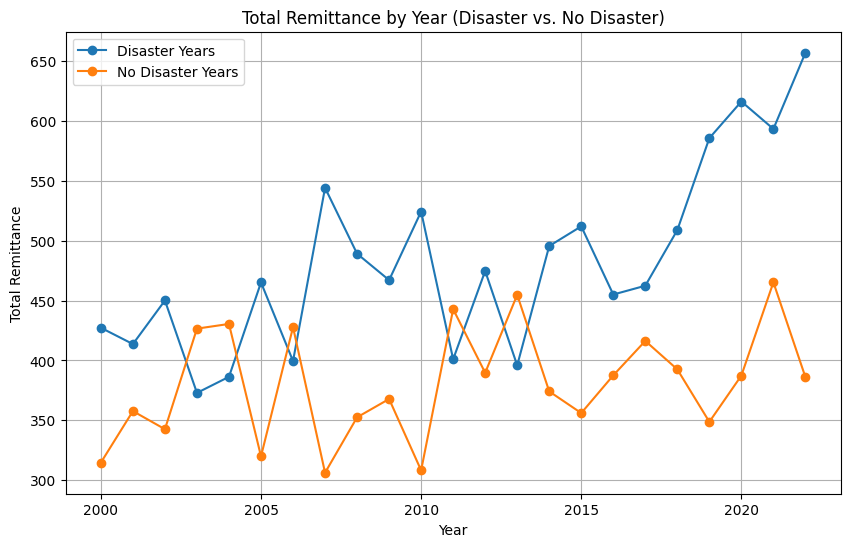

In [204]:
# Sum up remittance values for all columns by year for disaster and no disaster groups
disaster_grouped_sum = disaster_grouped.groupby('Year')['Remittance'].sum()
no_disaster_grouped_sum = no_disaster_grouped.groupby('Year')['Remittance'].sum()

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(disaster_grouped_sum.index, disaster_grouped_sum.values, marker='o', label='Disaster Years')
plt.plot(no_disaster_grouped_sum.index, no_disaster_grouped_sum.values, marker='o', label='No Disaster Years')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Remittance')
plt.title('Total Remittance by Year (Disaster vs. No Disaster)')
plt.grid(True)
plt.show()
